<a href="https://colab.research.google.com/github/Ladry2010/diplom-ecommerse/blob/E-commerse_diplom/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%228671d3bf_143f_48e9_b84f_c23639b8d119_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving сборный-1 игры.ipynb to сборный-1 игры.ipynb


# Проект:E-commerce —Выявление профилей потребления.

# Задача :

Сегментация клиентов по профилю потребления для интернет -магазина товаров для дома и быта «Пока все ещё тут». В результате работы заказчик сможет выполнять свои бизнес задачи более эффективно.

# ТЗ :



<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>
    
-провести предобработку данных

-в результате ИАД разбить товары на категории, посмотреть общие показатели работы магазина

-выполнить сегментацию клиентов магазина по профилю потребления, исследовать получившиеся сегменты

-сформулировать гипотезы и сравнить выборки по показателям сегментов

-сделать выводы и рекомендации</b>

## Изучение данных

Выбираем датасет из двух предложенных.Выбираем -ecommerce_dataset.csv . Датасет описывает транзакции интернет-магазина.Загружаем выбранный датасет в юпитер . Применяем метод info ()

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("ecommerce_dataset.csv")
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Тип столбца дата неправильный

## Предобработка данных

Колонку  с датой приводим к типу datetime

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


2.Методом isna() изучаем пропуски в данных

In [ ]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропусков в данных нет

3.Проверяем на дубликаты явные и неявные .Удаляем дубликаты при их наличии

In [ ]:
print(data.duplicated().sum())

0


Явных дубликатов нет

От заказчика известно ,что возможно дублирование заказов ,у которых  разная дата. Посмотрим дубликаты по всем столбцам,кроме даты

In [ ]:
duplic = data[data.duplicated([ 'customer_id','order_id','product','quantity','price'])]
duplic

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Получилось 1864 дубликата ,удалим их

In [ ]:
data = data.drop_duplicates(subset=['customer_id','order_id','product','quantity','price'], keep='first')
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Проверим нет ли у нас заказов, у которых есть два разных покупателя удалим их</b>

In [ ]:
data_dupl = data.groupby('order_id')['customer_id'].nunique().reset_index().query('customer_id>1')
data_dupl.count()

order_id       29
customer_id    29
dtype: int64

In [ ]:
list_dupl= data_dupl['order_id'].tolist()


In [ ]:
data = data.query('order_id not in @list_dupl')
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0


Датасет подготовлен к исследованию

## Исследовательский анализ данных

**Выполним категоризацию товаров по направлениям :растения ,для дома (интерьер) ,хозтовары ,оборудование для дома,кухня**

Из столбца product выделим первое слово ,по которому можно догадаться о принадлежности товара к определенной категории

In [ ]:
data['name_categ'] = data['product'].apply(lambda x: x.split(' ')[0])
data

,date,customer_id,order_id,product,quantity,price,name_categ
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус
...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,Таз
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,Сумка-тележка
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,Герань
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,Таз


Сгруппируем по новму столбцу ,чтобы посмотреть ,как часто употребляется слово для поиска категории

In [ ]:
(data
     .pivot_table(index='name_categ',values='quantity',aggfunc='count')
     .sort_values(by='quantity',ascending=False)

).head(50)

,quantity
name_categ,
Рассада,1372
Пеларгония,797
Сумка-тележка,337
Сушилка,310
Муляж,207
Петуния,163
томата,162
Гладильная,144
Коврик,121


Займемся распределением поисковых слов в списки по категориям. Часто встречающиеся слова предпочтительно должны попасть в эти списки(из датафрейма выше ).Посмотрим уникальные значения столбца name_categ

In [ ]:
data['name_categ'].unique()

array(['Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус',
       'Шеффлера', 'Юкка', 'Настенная', 'Таз', 'Чехол', 'Вешалка',
       'Сушилка', 'Крючок', 'Корзина', 'Мини-сковорода', 'Сковорода',
       'Стеклянная', 'Доска', 'Сумка-тележка', 'Многолетнее', 'Рассада',
       'Муляж', 'Щетка-сметка', 'Сумка', 'Тарелка', 'Вилка', 'Ложка',
       'Нож', 'Герань', 'Ерш', 'Пеларгония', 'Котел', 'Суккулент',
       'Эхеверия', 'Набор', 'Коврик', 'Подкладка', 'Дозатор', 'Ёрш',
       'Эвкалипт', 'Цветок', 'Мусорный', 'Плед', 'Скатерть', 'Кувшин',
       'Адиантум', 'Ковер', 'Перчатки', 'Стремянка', 'Гладильная',
       'Лестница-стремянка', 'Толкушка', 'Тележка', 'Готовая',
       'Искусственный', 'Простыня', 'Чайник', 'Штора', 'Банка', 'Стяжка',
       'Комплект', 'Кампанула', 'Декоративная', 'Противень', 'Калатея',
       'Нолина', 'Плечики', 'Подушка', 'Полотенце', 'Хлорофитум',
       'Цикламен', 'Крепеж', 'Пружина', 'Глоксиния', 'Азалия',
       'Гортензия', 'Хризантема', 'Петля', 

In [ ]:

data['name_categ'].nunique()

461

In [ ]:
plants = ['Многолетник','Томат','Артемизия','Морковь','Кипарисовик','Ель','Гиностемма','Кореопсис','Кампанула','Афеляндра','Анемона','Альбука','Годеция','Чабер','Лапчатка','Фикус','Седум','Любисток','Кориандр','Цикламен','Сальвия','Аптения','Котовник','Портулак','Мединилла','Цикламен','Молодило','Зверобой','Земляника','Овсянница','Нивянник','Алиссум','Бальзамин','Цинерария','Виола','Крокусы','Агератум','Цветущее','Маттиола','Подсолнечник','Пуансеттия','Камнеломка','Девичий','Каланхое','Львиный','Георгина','Капуста','Кофе','Тимьян','Цинния','Эпипремнум','Подарочный','Ранункулус','Дендробиум','Шеффлера','Эхинокактус','Гвоздика','Спатифиллум','Комнатное','Юкка','Мимоза','Хризолидокарпус' ,'Радермахера','Рассада', 'Герань','Пеларгония','Суккулент','Многолетнее' ,'Эхеверия', 'Эвкалипт','Цветок','Адиантум', 'Колокольчик','Калатея', 'Нолина', 'Хлорофитум', 'Цикламен','Циперус', 'Глоксиния', 'Азалия', 'Гортензия', 'Хризантема', 'Мирт', 'Цветущая', 'Иссоп', 'Сантолина' , 'Аспарагус', 'Афеландра', 'Бурорез', 'Антуриум', 'Янг', 'Фиалка', 'Гербера', 'Душица', 'Мелисса', 'Роза', 'Бегония', 'Розмарин', 'Холодная', 'Крассула', 'Полынь', 'Лаванда', 'Мята', 'Каланхоэ', 'Примула', 'Бархатцы', 'Космея', 'Настурция', 'Огурец', 'Петуния', 'Пуансетия', 'Скиммия', 'Фиттония', 'Алоэ', 'Цикламен', 'Гимнокалициум', 'Гипсофила', 'Калибрахоа', 'Аквилегия', 'Базилик', 'Горох', 'Незабудка', 'Очиток', 'Помидор', 'Укроп', 'Калибрахоа','Нефролепис', 'Калла', 'Декабрист', 'Тюльпан', 'Гиацинт', 'Вербена', 'Бакопа', 'Лютик', 'Газания', 'Овсяница', 'Георгин', 'Циния', 'Лавр', 'Вербейник', 'Фиалка', 'Колокольчик', 'Катнивник', 'Эхинацея', 'Ясколка', 'Лилейник', 'Папоротник', 'Платикодон', 'Энотера','томата','Однолетнее','Бакопа','Лобелия', 'Дыня','Вербена','Фуксия','Герань','Флокс','Лобелия',
'Фуксия','Пеперомия','Синнин' ,'Гардения','Табак','Мускари','Пиретрум','Колеус', 'Гвоздика','Тагетис', 'Цинерания', 'Муррайя', 'Пурслула', 'Астра', 'Аргирантерум', 'Левкой', 'Вероника', 'Целозия', 'Шалфей', 'Джункус', 'Драцена', 'Фатсия', 'Хоста', 'Гайлардия', 'Монарда', 'Нивьянник', 'Рудбекия', 'Барвинок', 'Осина', 'Спина', 'Сциндапсус', 'Бузульник', 'Саксифрагия', 'Солидаго', 'Физостегия', 'Бадан', 'Лен', 'Антинакипин', 'Лантана', 'Лаватера', 'Ветреница', 'Буддлея', 'Валериана', 'Змееголовый', 'Любисток ', 'Петрушка', 'Сельдерей', 'Шалфей', 'Вигна', 'Кабачок', 'Тыква', 'Хамедорея', 'зверобой', 'мединилла', 'недотрога', 'амариллис', 'пахира', 'литопс','Арбуз', 'Баклажан', 'Клубника', 'Патиссон', 'Лук','Замиокулька','Салат','Диффенбахия','Фаленопсис']
kitchen =['Казан','Блюдо','Мантоварка','Картофелемялка','Рассекатель','Орехоколка','Пьезозажигалка','Толкушка','Скалка','Миксер','Венчик','Сито','Тортница','Стеклянная','Tepмокружка','Хлебница','Кувшин','Форма','Ножеточка','Термос','Кухонные','Чайная','Лоток','Чайный','Корзинка','Кухонное','Сервировочная','Столовый','Емкость','Пьезо-зажигалка', 'Соковыжималка', 'Сахарница', 'Банка', 'Сепаратор', 'Шприц',  'Прищепки', 'Соковарка', 'Решетка', 'Ковш','Тарелка', 'Вилка', 'Ложка',' Пьезозажигалка','Нож','Смеситель','Разделочная','Мини-сковорода','Салфетка','Набор','Миска','Сковорода','Стакан','Чайник','Противень','Салфетка','Смеситель','Мойка','Термокружка', 'Насадка','Насадка для отжима','Масленка','Фарфоровая','Сервировка','Салатница','Мерка','Кружка','Салфетница','Стакан','Чай','Овощечистка','Измельчитель','Поднос','Мантоварка-пароварка','Просеиватель','Кастрюля','Тарелка','Губка','Половник','Блюдце','Разделочная','Пресс','Термостакан','Термокружка','Электроштопор','Сотейник','Бидон','Завертка', 'Ручка','Мерный','Сервировка', 'Салатница','Овощеварка', 'Рыбочистка', 'Терка','Противень','Бульонница']
home = ['Наволочка','Ковер','Ковёр','Наматрасник','Наматрицник-чехол','Махровый','Календула','Двуспальное','Покрывало','Простыня','Махровое','Комплект','Наматрацник','Нетканые','Ткань','Декоративная','Вешалка-плечики','Щетка-утюжок','Новогоднее','Плечики','Вешалки','Настенная' ,'Муляж','Тапочка-3', 'Пододеяльник', 'Искусственный', 'Ваза',  'Чехол','Запасной','Искусственная', 'Подушка','Полотенце','Фен','Одеяло',' Двуспальное','Покрытие','Простынь','Светильник','Коврик','Подкладка', 'Набивка','Плед','Халат','Декоративный','Кофр', 'Скатерть']
housegoods = ['Веревка','Бельевые','Жидкое','Пробка','Универсальное','Антижир','Стиральный','Насадка-отжим','Бальзам','Чистящий','Держатель','Подрукавник','Рукав','Совок','Зубная','Бак','Щётка','Отжим','Тряпкодержатель','Сменная','Дозатор','Концентрат','Ерш','Корыто','Шнур','Кольца','Средство','Мыло-скраб','Модульная','Фиксатор-шар','Перчатки','Вантуз','Щетка-сметка','Шпингалет','Крепеж','Таз','Ведро','Крючок','Сметка','Защелка','Универсальный','Штора','Веник','Швабра','Крепление','Ведро','Пружина','Петля','Диспенсер', 'Доска',' Жесть','Ополаскиватель','Сетка','Щетка','Корзина','Шило','Кисточка','Скребок','Крышка','Ручка-скоба','Мыльница','Фантик', 'Чепка',' Бельевые','Антинакипин', 'Шпагат','Прищепки','Тряпка', 'Мыло','Запасная','Отбеливатель','Вакуумный','Отделитель','Уголок','Мешок','Мусорный','Бензин', 'Паста', 'Петля-стрела','Пена','Чистка','Кондиционер','Ключница','Ёрш']


equipment = ['Бойлер','Урна','Штанга','Лестница','Котел','Урна-пепельница','Вешалка-стойка','Автоматическая','Пылесос','Стремянки','Сверло','Лестница-стремянка','Короб','Складная','Коробка','Вешалка-перекладина','Сумка','Стяжка' ,'Ванна','Стяжки','Угловой','Складной','Стойка','Вакуумный','Комната', 'Стенка', 'Сумка-тележка','Стол', 'Сиденье', 'Столовая', 'Комод', 'Стремянка-табурет', 'Полка','Вкладыши','Ящик','Контейнер', 'Сушилка','Делитель','Лопата','Утюг','Линейка','Весы','Подставка','Вешалка-сушилка','Мультифункционал','Мойка окон','Автоматическая тряпкодержатель', 'Обувница-3', 'Карниз','Подвесное', 'Салатник','Стремянка','Вешалка','Тележка','Гладильная','Стеллаж','Кипятильник','Дрель','Этажерка','Полки','Штангенциркуль','Окномойка']



И добавим в наш датасет столбец категория. Категория 'другое ' должна быть как можно меньше,не превышать 5% от общего кол-ва товаров во всех категорях

In [ ]:
data['category'] = 'другое'
data.loc[data.query('name_categ == @plants').index, 'category'] = 'растения'
data.loc[data.query('name_categ == @kitchen').index, 'category'] = 'кухня'
data.loc[data.query('name_categ== @housegoods').index, 'category'] = 'хозтовары'
data.loc[data.query('name_categ == @equipment').index, 'category'] = 'оборудование'
data.loc[data.query('name_categ == @home').index, 'category'] = 'для дома'
data

,date,customer_id,order_id,product,quantity,price,name_categ,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное,растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное,растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,растения
...,...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,Таз,хозтовары
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,Сумка-тележка,оборудование
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,Герань,растения
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,Таз,хозтовары


Проверяем себя такой группировкой по категорям ,сначала ' другое ' была довольно большая.

In [ ]:
data.groupby(['category']).count().sort_values(by='quantity',ascending=False)

,date,customer_id,order_id,product,quantity,price,name_categ
category,,,,,,,
растения,3905,3905,3905,3905,3905,3905,3905
оборудование,1248,1248,1248,1248,1248,1248,1248
для дома,678,678,678,678,678,678,678
хозтовары,455,455,455,455,455,455,455
кухня,370,370,370,370,370,370,370
другое,81,81,81,81,81,81,81


Постепенно ориентируюсь на такой срез ,пополняли наши списки категорий и 'другое ' уменьшалось

In [ ]:
data.query('category=="другое"').sort_values(by='quantity',ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,name_categ,category
1089,2018-12-03 13:00:00,7b49bc1e-97c1-4489-9c84-fa781f987661,69188,Жестяная банка Новая паста микс П-90*90h171v14...,6,135.0,Жестяная,другое
6654,2019-10-20 14:00:00,f5338bd4-e137-4f11-a863-843712202318,73034,"Основание для пробки электрический 25 А, 1601164",3,52.0,Основание,другое
1538,2019-01-18 08:00:00,f56005a0-cf94-4cce-a1ef-d22c1c7fe70c,69869,"Жестяная банка Гуси 0,8 л 11х9,9 см Ц99h110v08...",3,104.0,Жестяная,другое
1206,2018-12-14 18:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое
1091,2018-12-03 19:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое
1133,2018-12-08 18:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое
1135,2018-12-08 21:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое
1136,2018-12-09 13:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое
1138,2018-12-09 14:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое
1139,2018-12-09 15:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,Термометр,другое


**-Проведем общий анализ показателей магазина. Визуализируем его**

1.Добавим столбец только с датой  days

In [ ]:
data['month'] = data['date'].apply(lambda x: x.strftime('%Y-%m'))
data


,date,customer_id,order_id,product,quantity,price,name_categ,category,month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное,растения,2018-10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное,растения,2018-10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,растения,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,растения,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,растения,2018-10
...,...,...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,Таз,хозтовары,2019-10
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,Сумка-тележка,оборудование,2019-10
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,Герань,растения,2019-10
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,Таз,хозтовары,2019-10


2.Добавим столбец total_revenue ,где будет посчитана сумма с учетом кол-ва купленного товара

In [ ]:
data['total_revenue'] = data['quantity'] * data['price']
data

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное,растения,2018-10,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное,растения,2018-10,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,растения,2018-10,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,растения,2018-10,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,растения,2018-10,112.0
...,...,...,...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,Таз,хозтовары,2019-10,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,Сумка-тележка,оборудование,2019-10,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,Герань,растения,2019-10,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,Таз,хозтовары,2019-10,397.0


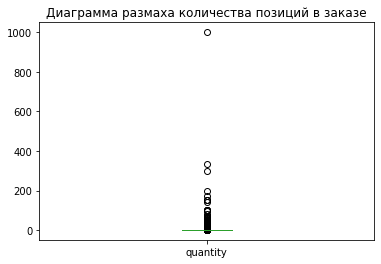

In [ ]:
data['quantity'].plot(kind='box', title='Диаграмма размаха количества позиций в заказе')
plt.show()

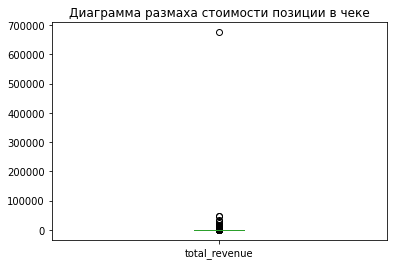

In [ ]:
data['total_revenue'].plot(kind='box', title='Диаграмма размаха стоимости позиции в чеке')
plt.show()

In [ ]:
data['total_revenue'].describe()#посмотрим аномалию

count      4807.000000
mean        851.802580
std        9873.882657
min           9.000000
25%         120.000000
50%         194.000000
75%         734.000000
max      675000.000000
Name: total_revenue, dtype: float64

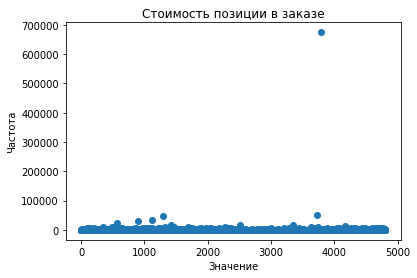

In [ ]:
x_values = pd.Series(range(0,len(data['total_revenue'])))
plt.scatter(x_values, data['total_revenue'])
plt.title('Стоимость позиции в заказе')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Посмотрим выброс на срезе

In [ ]:
data.query('total_revenue>=600000')

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,Вантуз,хозтовары,2019-06,675000.0


Мы видим оптовый заказ вантузов ,он может исказить общую картину по выручке,по диаграмме будет непонятн всплеск продаж в июне ,избавимся от него.

In [ ]:
data = data.query('total_revenue < 675000')

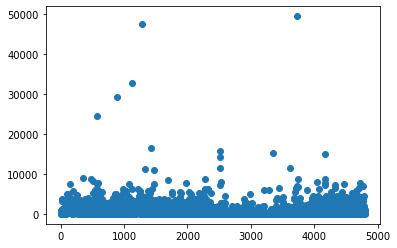

In [ ]:
x_values = pd.Series(range(0,len(data['total_revenue'])))
plt.scatter(x_values, data['total_revenue'])
plt.show()

In [ ]:
data.query('total_revenue>=20000')

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue
661,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",5,4874.0,Урна,оборудование,2018-11,24370.0
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,Набор,кухня,2018-11,29248.0
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъе...,57,574.0,Тележка,оборудование,2018-12,32718.0
1518,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-0...,27,1755.0,Простынь,для дома,2019-01,47385.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,Вешалки,для дома,2019-06,49432.0
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,Вантуз,хозтовары,2019-06,675000.0


Строки из заказов не удаляем

Есть выбросы ,посмотрим на них через срез

In [ ]:
data.query('quantity>100')

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,Крепеж,хозтовары,2018-10,2850.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0,Пружина,хозтовары,2018-10,5700.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0,Муляж,для дома,2018-11,8670.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0,Муляж,для дома,2018-11,8260.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,Ручка-скоба,хозтовары,2018-12,5800.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0,Плечики,для дома,2019-03,3000.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,Муляж,для дома,2019-05,15300.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,Вешалки,для дома,2019-06,49432.0


Возможно это оптовики ,оставим их

Посмотрим заказы магазина в динамике

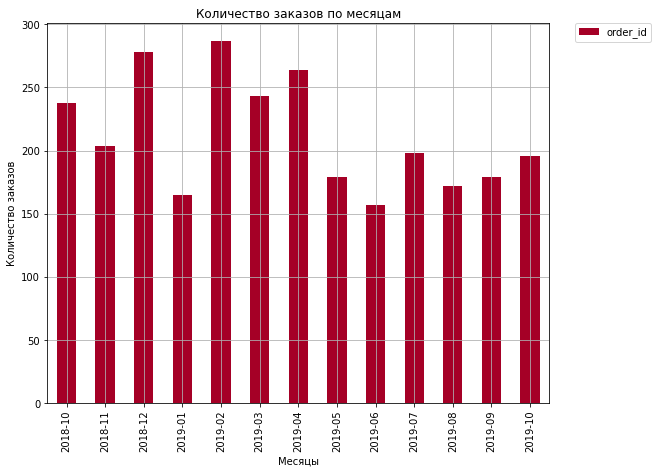

In [ ]:


(data
     .pivot_table(index='month',values='order_id',aggfunc='nunique')

     .plot.bar(y='order_id',cmap='RdYlBu',figsize=(9, 7))


)
plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Количество заказов")

plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Некоторая сезонность присутствет - перед новым годом(подарок по хозяйству ) и конец зимы-начало весны.В продаже много растений.Вот их видимо и покупают

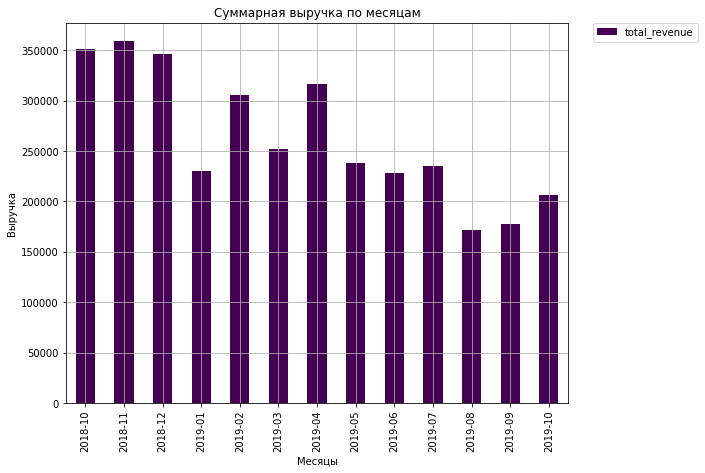

In [ ]:


(data
     .pivot_table(index='month',values='total_revenue',aggfunc='sum')

     .plot.bar(y='total_revenue',cmap='viridis',figsize=(9, 7))


)
plt.grid()
plt.title("Суммарная выручка по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Выручка")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Выручка колебалась по месяцам ,но в целом за год она снизилась раза в 1.5

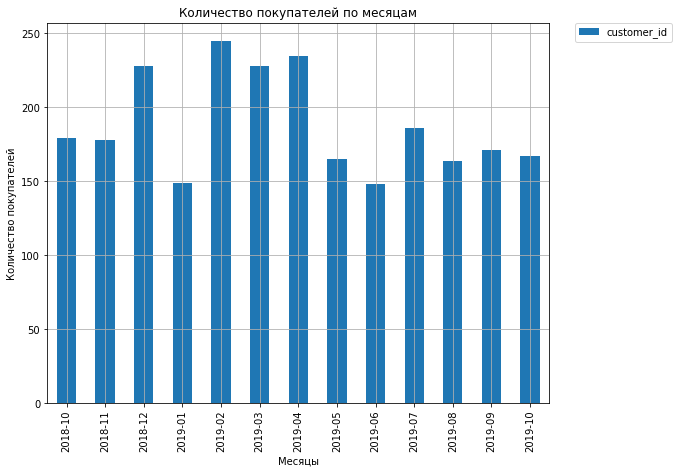

In [ ]:


(data
     .pivot_table(index='month',values='customer_id',aggfunc='nunique')

     .plot.bar(y='customer_id',figsize=(9, 7))


)
plt.grid()
plt.title("Количество покупателей по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Количество покупателей")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Наблюдается отток покупателей и те,что есть ,покупают не все активно. Рассмотрим это при сегментации клиентов

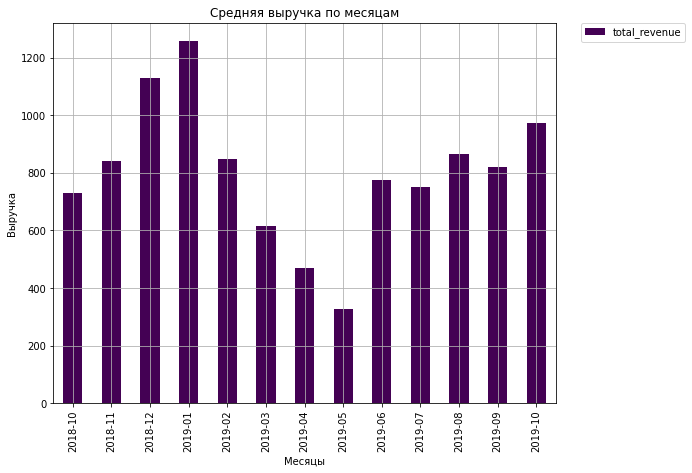

In [ ]:


(data
     .pivot_table(index='month',values='total_revenue',aggfunc='mean')

     .plot.bar(y='total_revenue',cmap='viridis',figsize=(9, 7))


)
plt.grid()
plt.title("Средняя выручка по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Выручка")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

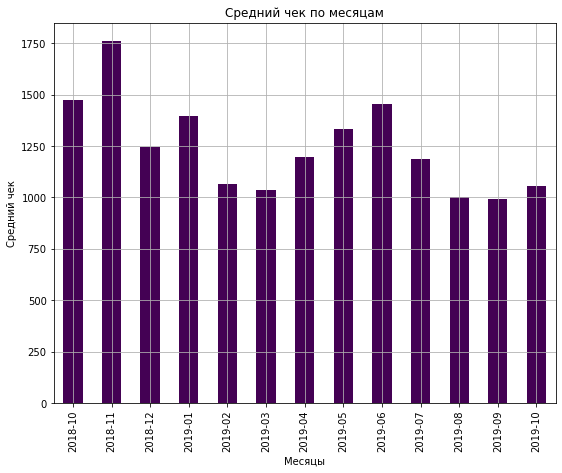

In [ ]:
#Добавлено ревьюером

(data
     .groupby(['month', 'order_id'], as_index=False).agg({'total_revenue': 'sum'}) #считаем сумму каждого заказа
     .groupby('month', as_index=False).agg({'total_revenue': 'mean'}) # а теперь смотрим средний показатель за каждый месяц
     .plot.bar(x='month', y='total_revenue', cmap='viridis', figsize=(9, 7), legend=False)


)
plt.grid()
plt.title("Средний чек по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Средний чек")
plt.show()

In [ ]:
data.head()

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное,растения,2018-10,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное,растения,2018-10,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,растения,2018-10,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,растения,2018-10,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,растения,2018-10,112.0


Средняя выручка растет к новогодним праздникам ,потом снижаетсчя

Посмотрим ,как распределена выручка по категориям

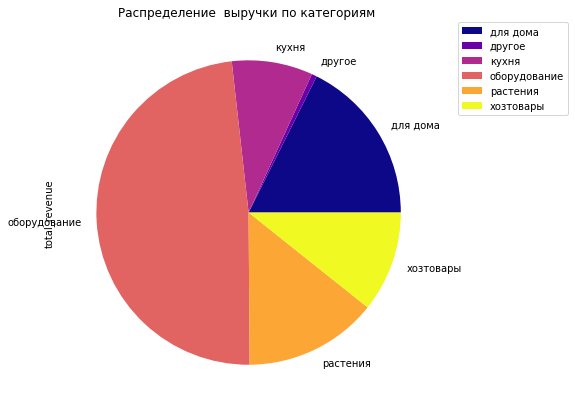

In [ ]:

(data
      .pivot_table(index='category',values='total_revenue',aggfunc='sum')
      .plot.pie(y='total_revenue',cmap='plasma',figsize=(7, 7))

)
plt.title("Распределение  выручки по категориям ")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Основной доход приносит категория оборудование ,туда входят лестницы ,мебель,тележки.Но эти тоавары мало представлены в магазине,а вот растения широко представленные в магазине дохода приносят мало

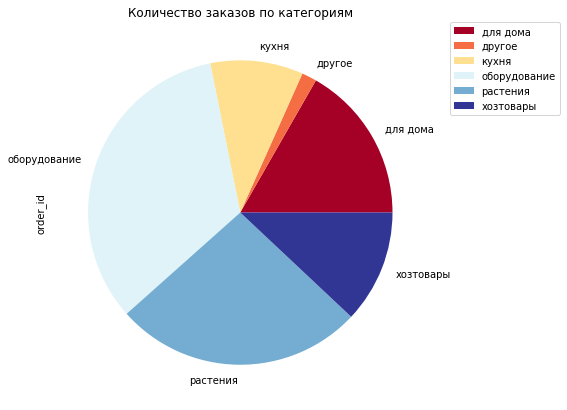

In [ ]:

(data
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='RdYlBu',figsize=(7, 7))

)
plt.title("Количество заказов по категориям")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

А покупают в основном растения и оборудование

**-Проведем сегментацию клиентов**

Для сегментации клиентов воспользуемся методом RFM-анализа. Он делит пользователей на сегменты в зависимости от давности (Recency), частоты (Frequency) и общей суммы платежей (Monetary).

Recency — разница между текущей датой и датой последнего платежа,
Frequency — количество транзакций,
Monetary — сумма покупок.

Эти три показателя нужно рассчитать отдельно для каждого покупателя. После чего поставить оценки от  1 до  4

In [ ]:
last_date =data['date'].max() + timedelta(days=1)
data_rfm = data.reset_index().groupby('customer_id').agg({'date': lambda x: (last_date - x.max()).days,
                                                 'order_id': lambda x: x.nunique(),
                                                 'total_revenue': lambda x: x.sum()})
data_rfm.rename(columns={'date': 'recency',
                          'order_id': 'frequency',
                          'total_revenue': 'monetary_value'}, inplace=True)
data_rfm

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,16,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,258,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.0
...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,77,1,1649.0
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,1,1191.0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,320,1,778.0


In [ ]:
data_rfm.sort_values(by='frequency',
        ascending=False).head()

,recency,frequency,monetary_value
customer_id,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,240,126,166988.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,373,35,60828.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,1,17,21713.0
b7b865ab-0735-407f-8d0c-31f74d2806cc,191,7,3779.0
0184f535-b60a-4914-a982-231e3f615206,162,5,7707.0


Напишем  функцию для присвоения оценок,используем квартили . Они разбивают упорядоченный набор данных на четыре части. Первый квартиль Q1 — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана  —  второй квартиль Q2, половина элементов больше и половина меньше неё.

Напишем две функции ,потому что в случае с recency чем меньше интервал в днях,тем более высокая оценка( недавно купил)

In [ ]:
# Помещаем квантили в словарь их три ,делим на четыре группы
quantiles = data_rfm.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
segmented_rfm = data_rfm.copy()
# Аргументы (x = value, p = recency, monetary_value, frequency)
def R_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FM_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4



segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(R_score, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FM_score, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FM_score, args=('monetary_value',quantiles,))
segmented_rfm['rfm_score'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,16,1,555.0,4,1,2,412
001cee7f-0b29-4716-b202-0042213ab038,258,1,442.0,2,1,2,212
00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.0,4,1,3,413
002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.0,2,1,3,213
003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.0,4,1,4,414


In [ ]:
segmented_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2451 entries, 000d6849-084e-4d9f-ac03-37174eaf60c4 to ffe82299-3f5b-4214-87fe-3d36ecccfac3
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         2451 non-null   int64  
 1   frequency       2451 non-null   int64  
 2   monetary_value  2451 non-null   float64
 3   r_quartile      2451 non-null   int64  
 4   f_quartile      2451 non-null   int64  
 5   m_quartile      2451 non-null   int64  
 6   rfm_score       2451 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 153.2+ KB


In [ ]:
segmented_rfm.groupby(['rfm_score']).mean().sort_values(by='monetary_value',ascending=False)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
rfm_score,,,,,,
244,258.300000,14.500000,24509.300000,2.0,4.0,4.0
314,162.939655,1.000000,11615.603448,3.0,1.0,4.0
144,333.400000,5.500000,10945.000000,1.0,4.0,4.0
344,175.034483,2.551724,6337.206897,3.0,4.0,4.0
444,55.789474,2.947368,4981.684211,4.0,4.0,4.0
114,348.572289,1.000000,4399.391566,1.0,1.0,4.0
414,52.059829,1.000000,4279.299145,4.0,1.0,4.0
214,250.863636,1.000000,3771.219697,2.0,1.0,4.0
143,342.833333,2.000000,1242.000000,1.0,4.0,3.0


In [ ]:
segmented_rfm['rfm_score'].nunique()

32

 Значения столбца rfm_score показывает какие оценки встретятся в строке  ,по этим критериям установим сегменты клиентов,распишем их. Распределять в сегменты будем по смыслу.

'client_top' ( покупали недавно ,много,дорого ) 444, 434,443,344

'client_out'( покупали давно, мало дешево ) 111,121,211,221  

'client_loyal_out'-лояльные клиенты на пороге оттока ( покупали давно ,много ,дорого ) 144,143,134,133

'client_loyal_econom' 441,442,432,431  покупали недавно,много ,дешево

'client_new' новые клиенты (покупали недавно)414,413,412,411

'client_const' постоянные клиенты .Самая большая группа ,имеющая средние показатели.

In [ ]:
def client(x):
    if (x == '444' or x == '434' or x == '443' or x == '344' ):
        return 'client_top'
    elif (x == '111'or x == '211' or x == '121'or x == '221'):
        return 'client_out'
    elif (x == '414'or x == '413' or x == '412'or x == '411'):
        return 'client_new'
    elif (x == '144' or x == '143' or x == '134'or x == '133'):
        return 'client_loyal_out'
    elif (x == '441' or x == '442' or x == '432'or x == '431'):
        return 'client_loyal_econom'
#    elif (x == '334'or x == '333' or x == '343'or x == '324'):
#        return 'client_loyal'
    else:
        return 'client_const'

In [ ]:
segmented_rfm['client'] = segmented_rfm['rfm_score'].apply(client)
segmented_rfm
#data['total_income_category'] = data['total_income'].apply(categorize_income)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,client
customer_id,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,16,1,555.0,4,1,2,412,client_new
001cee7f-0b29-4716-b202-0042213ab038,258,1,442.0,2,1,2,212,client_const
00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.0,4,1,3,413,client_new
002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.0,2,1,3,213,client_const
003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.0,4,1,4,414,client_new
...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,77,1,1649.0,4,1,3,413,client_new
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,1,1191.0,4,1,3,413,client_new
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,320,1,778.0,1,1,3,113,client_const


Соединим исходный датасет с категориями с этим с сегментами

In [ ]:


df = data.merge(segmented_rfm, on='customer_id')
df

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,client
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное,растения,2018-10,142.0,396,1,1037.0,1,1,3,113,client_const
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное,растения,2018-10,194.0,396,1,1037.0,1,1,3,113,client_const
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,растения,2018-10,112.0,396,1,1037.0,1,1,3,113,client_const
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,растения,2018-10,179.0,396,1,1037.0,1,1,3,113,client_const
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,растения,2018-10,112.0,396,1,1037.0,1,1,3,113,client_const
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732,2019-10-30 21:00:00,b24b3075-bbb5-498c-add9-534a727f3c33,73151,Герань домашняя (пеларгония зональная) цветуща...,2,157.0,Герань,растения,2019-10,314.0,1,1,314.0,4,1,1,411,client_new
6733,2019-10-31 09:00:00,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,Литопс Микс d-5 см,1,112.0,Литопс,другое,2019-10,112.0,1,1,112.0,4,1,1,411,client_new
6734,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,Мимоза,растения,2019-10,329.0,1,1,329.0,4,1,2,412,client_new
6735,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,Сумка-тележка,оборудование,2019-10,1087.0,1,1,1087.0,4,1,3,413,client_new


In [ ]:
df_order = df.groupby([ 'order_id']).agg({'total_revenue': 'sum'}).reset_index()
df_order

,order_id,total_revenue
0,12624,375.0
1,13547,4788.0
2,14480,359.0
3,14481,600.0
4,14482,376.0
...,...,...
2779,73155,329.0
2780,73156,404.0
2781,73158,1087.0
2782,73162,157.0


array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'total_revenue'}>]], dtype=object)

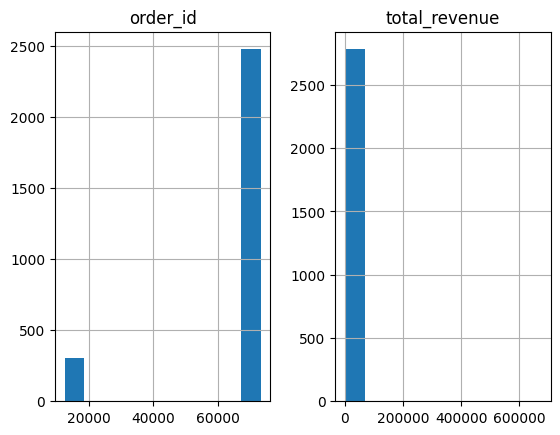

In [ ]:
df_order.hist()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Посмотрим средний чек покупателя</b>

In [ ]:
df_avg = df.groupby([ 'customer_id','client','month']).agg({'total_revenue': 'sum','order_id':'nunique'}).reset_index().sort_values(by='total_revenue', ascending = False)
df_avg['avg_chec']= (df_avg['total_revenue']/df_avg['order_id']).round()
df_avg

,customer_id,client,month,total_revenue,order_id,avg_chec
480,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,client_const,2019-06,675000.0,1,675000.0
295,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,client_const,2019-06,111690.0,1,111690.0
757,4d93d3f6-8b24-403b-a74b-f5173e40d7db,client_loyal_out,2018-10,60828.0,35,1738.0
864,58a4c3cc-504f-43ea-a74a-bae19e665552,client_const,2019-01,53232.0,2,26616.0
1971,c971fb21-d54c-4134-938f-16b62ee86d3b,client_const,2019-02,52286.0,28,1867.0
...,...,...,...,...,...,...
2414,f420bf6d-9985-47bc-95a7-5c640ad6d001,client_out,2019-01,22.0,1,22.0
418,2b6439c9-1ae1-4785-9509-ca4348b3d39a,client_const,2019-04,22.0,1,22.0
340,2330d859-e9cb-4c8f-abd0-55f9e27e6745,client_out,2018-11,15.0,1,15.0
2403,f32b5708-af61-42e7-baba-9f3759d87841,client_const,2019-06,15.0,1,15.0


In [ ]:
df_avg['client'].unique()

array(['client_const', 'client_loyal_out', 'client_top', 'client_new',
       'client_loyal_econom', 'client_out'], dtype=object)

**Рассмотрим по сегментам :средний чек ,среднее кол-во заказов и покупателей**

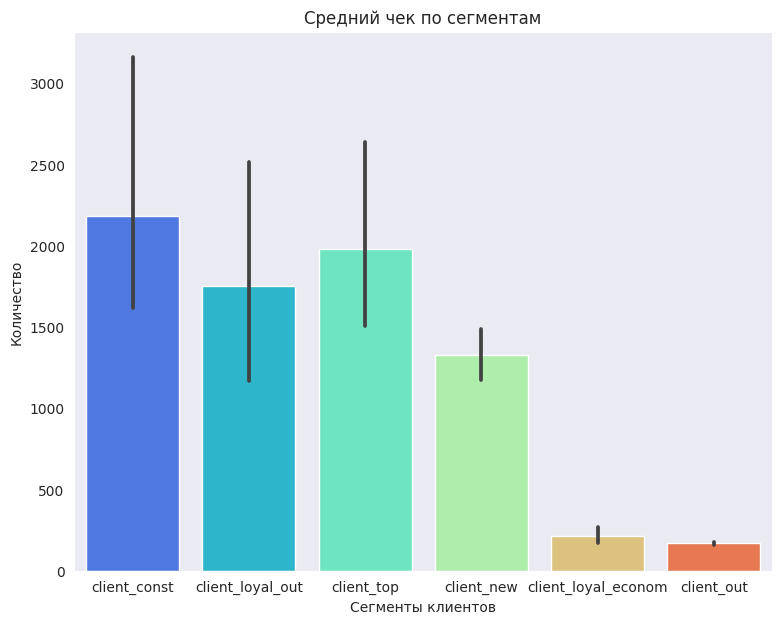

In [ ]:
#
sns.set_style('dark')
plt.figure(figsize=(9, 7))
sns.barplot(x='client', y='avg_chec', data=df_avg,palette='rainbow')
plt.title('Средний чек по сегментам')
plt.xlabel('Сегменты клиентов')
plt.ylabel('Количество')
plt.show()

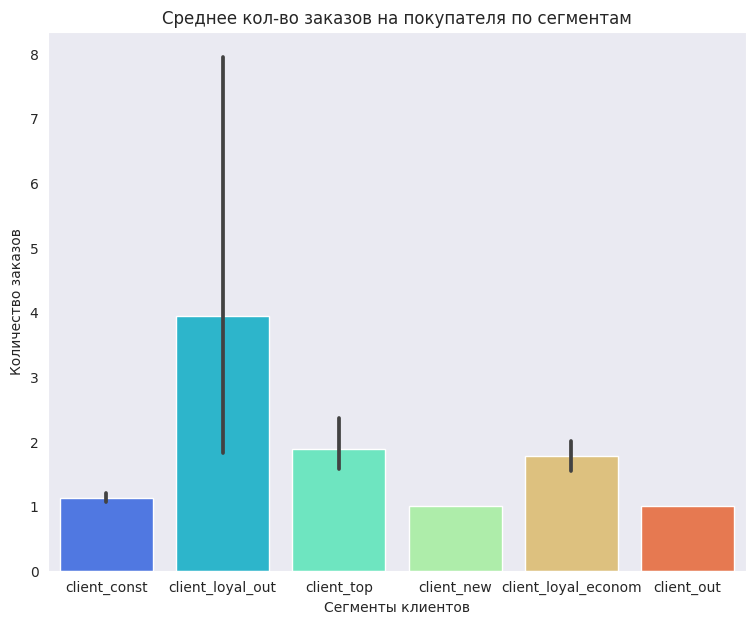

In [ ]:
#sns.set_style('dark')
plt.figure(figsize=(9, 7))
sns.barplot(x='client', y='order_id', data=df_avg,estimator=np.mean, palette='rainbow')
plt.title('Среднее кол-во заказов на покупателя по сегментам')
plt.xlabel('Сегменты клиентов')
plt.ylabel('Количество заказов')
plt.show()

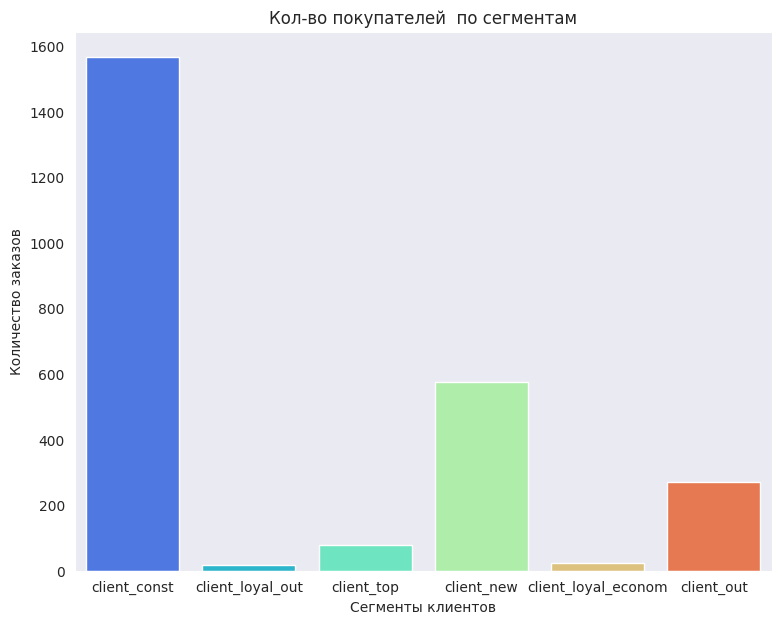

In [ ]:
plt.figure(figsize=(9, 7))
sns.countplot(x='client', data=df_avg, palette='rainbow')
plt.title('Кол-во покупателей  по сегментам')
plt.xlabel('Сегменты клиентов')
plt.ylabel('Количество заказов')
plt.show()

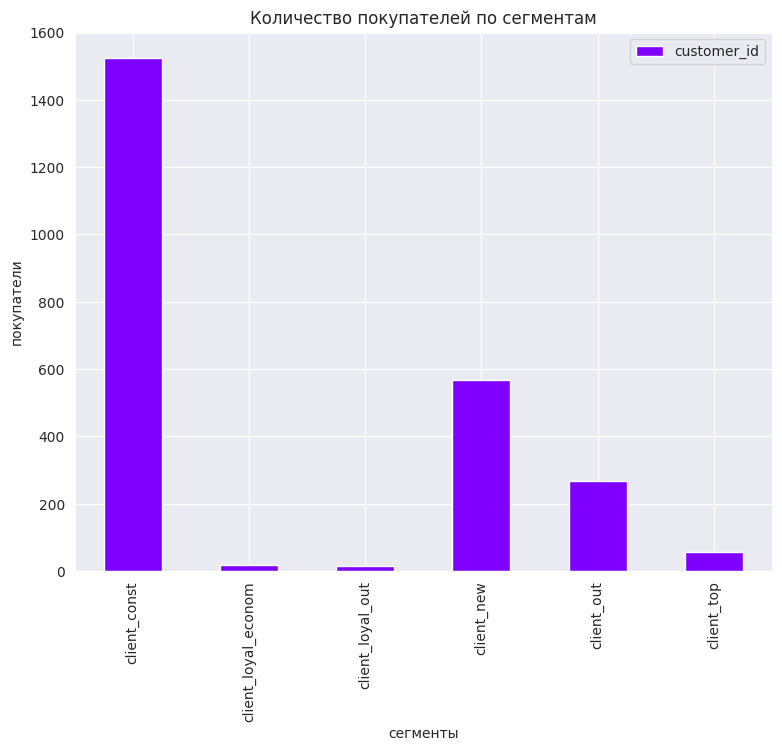

In [ ]:

(df_avg


     .pivot_table(index='client',values='customer_id',aggfunc='nunique')

     .plot.bar(y='customer_id',cmap='rainbow',figsize=(9, 7))


)

plt.grid()
plt.title("Количество покупателей по сегментам")
plt.xlabel("сегменты")
plt.ylabel("покупатели")
plt.show()

**Клиенты сегмента ТОП**

**Рассмотрим каждый сегмент по предпочтениям**


In [ ]:
df_avg['customer_id'].nunique()

2451

In [ ]:
df_top = df_avg.query('client=="client_top"')

In [ ]:
df_top['customer_id'].nunique()#кол-во покупателей

56

In [ ]:
round(df_top['avg_chec'].mean())#средний чек

1979

In [ ]:
df_top['order_id'].sum()#общее кол-во заказов в группе

147

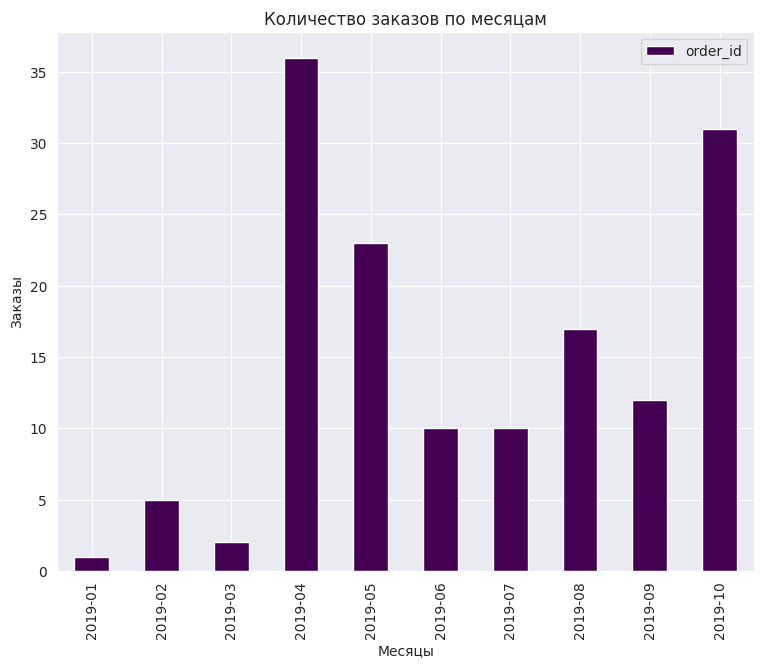

In [ ]:


(df_top


     .pivot_table(index='month',values='order_id',aggfunc='sum')

     .plot.bar(y='order_id',cmap='viridis',figsize=(9, 7))


)

plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Заказы")
plt.show()
#plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )


Активность в апреле-мае обусловлена видимо покупкой сезонного товара-растений. В октябре видимо мебель ,хранение ,лестницы из категории оборудования

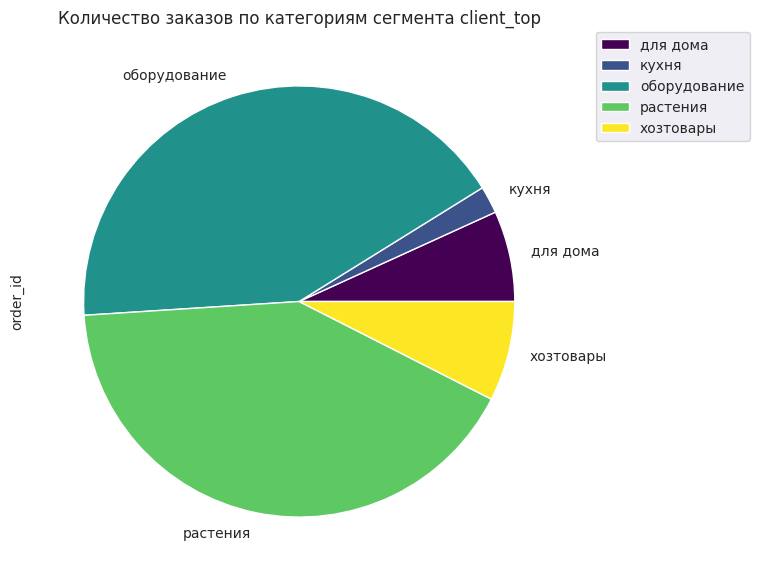

In [ ]:
(df
      .query('client=="client_top"')
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='viridis',figsize=(7, 7))

)
plt.title("Количество заказов по категориям сегмента client_top")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Клиенты сегмента в основном покупают дорогой товар -из оборудования и растения

 Сегмент ТОП - клиенты покупают недавно ,часто ,дорого Этот сегмент небольшой ,но важный  для магазин ,так как клиенты лояльны и покупают дорогую продукцию. **Рекомендация**-наблюдать за этой группой ,стимулировать активность индивидуальными бонусами и скидками. Расширять ассортимент качественных и дорогих товаров. Покупатели на него уже есть.

In [ ]:
df_loyal_out = df_avg.query('client=="client_loyal_out"')

In [ ]:
df_loyal_out['customer_id'].nunique()#кол-во покупателей

16

In [ ]:
round(df_loyal_out['avg_chec'].mean())#средний чек

1753

In [ ]:
df_loyal_out['order_id'].sum()#общее кол-во заказов в сегменте

67

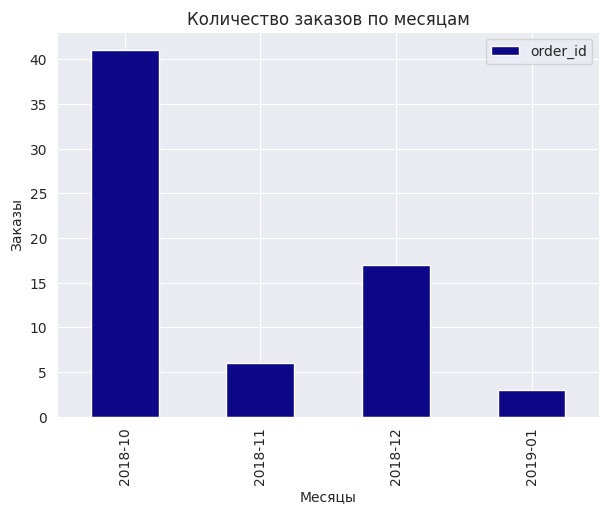

In [ ]:

(df_loyal_out


     .pivot_table(index='month',values='order_id',aggfunc='sum')

     .plot.bar(y='order_id',cmap='plasma',figsize=(7, 5))


)

plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Заказы")
plt.show()
#plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

В этом сегменте клиенты ,которые  перестали покупать почти год назад

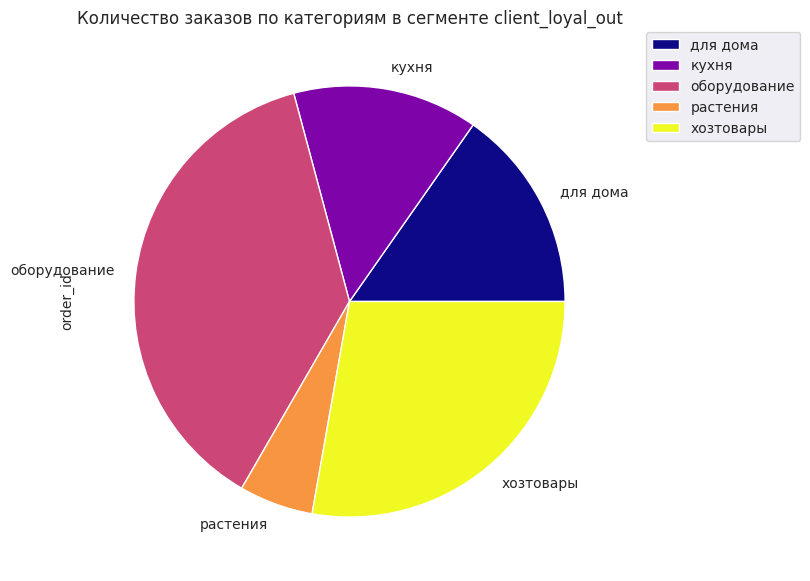

In [ ]:
(df
      .query('client=="client_loyal_out"')
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='plasma',figsize=(7, 7))

)
plt.title("Количество заказов по категориям в сегменте client_loyal_out")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Предпочитали  товары из категории оборудование и хозтовары ,совсем не нужны им были растения

Немногочисленный сегмент ,в котором клиенты перестали делать покупки и уже на выходе. Но у клиентов был достаточно высокий средний чек и за них можно побороться.**Рекомендация**- сделать для клиентов рассылку ,чтобы напомнить о магазине. Подготовить спец предложение в любимых категориях

In [ ]:
df_out = df_avg.query('client=="client_out"')

In [ ]:
df_out['customer_id'].nunique()#кол-во покупателей

268

In [ ]:
round(df_out['avg_chec'].mean())#средний чек

169

In [ ]:
df_out['order_id'].sum()#общее кол-во заказов в сегменте

270

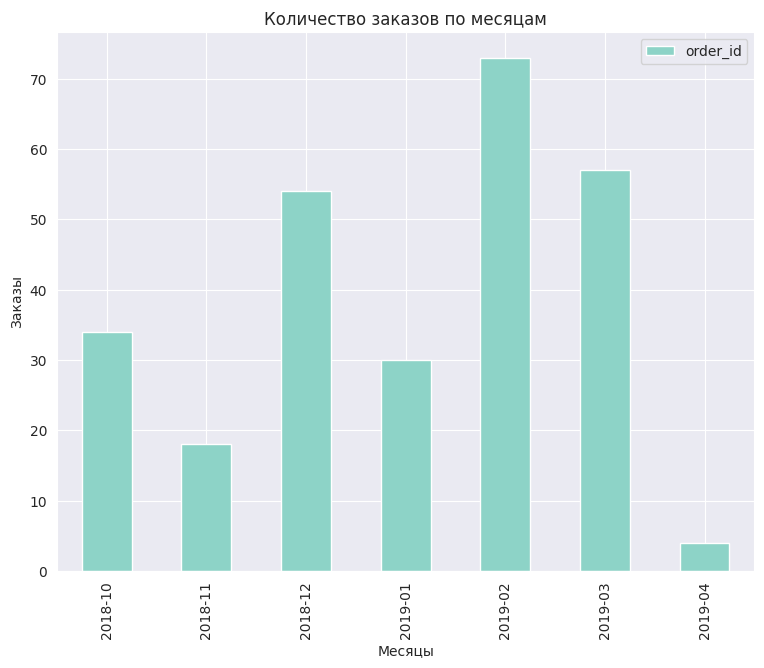

In [ ]:
(df_out


     .pivot_table(index='month',values='order_id',aggfunc='sum')

     .plot.bar(y='order_id',cmap='Set3',figsize=(9, 7))


)

plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Заказы")
plt.show()
#plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

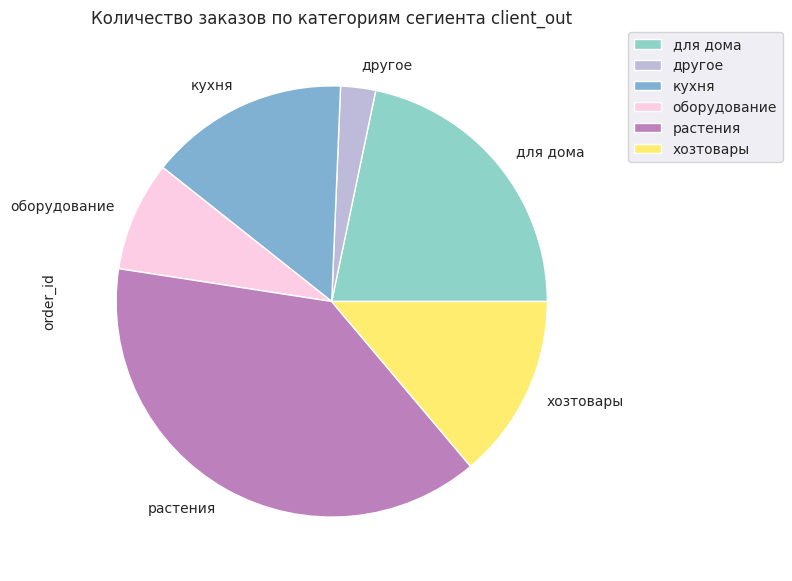

In [ ]:
(df
      .query('client=="client_out"')
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='Set3',figsize=(7, 7))

)
plt.title("Количество заказов по категориям сегиента client_out")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Клиенты полгода ничего не покупают ,клиенты на выходе ,этим было обусловлено выделение этого сегмента.Предпочтения-растения.**Рекомендации**-клиенты давно не  покупают ,когда делали покупку ,средний чек был низкий. Скорее всего-это уже потерянные клиенты.За них бороться нет смысла

In [ ]:
df_const = df_avg.query('client=="client_const"')

In [ ]:
df_const['customer_id'].nunique()#кол-во покупателей

1525

In [ ]:
round(df_const['avg_chec'].mean())#средний чек

2183

In [ ]:
df_const['order_id'].sum()#общее кол-во заказов в сегменте

1749

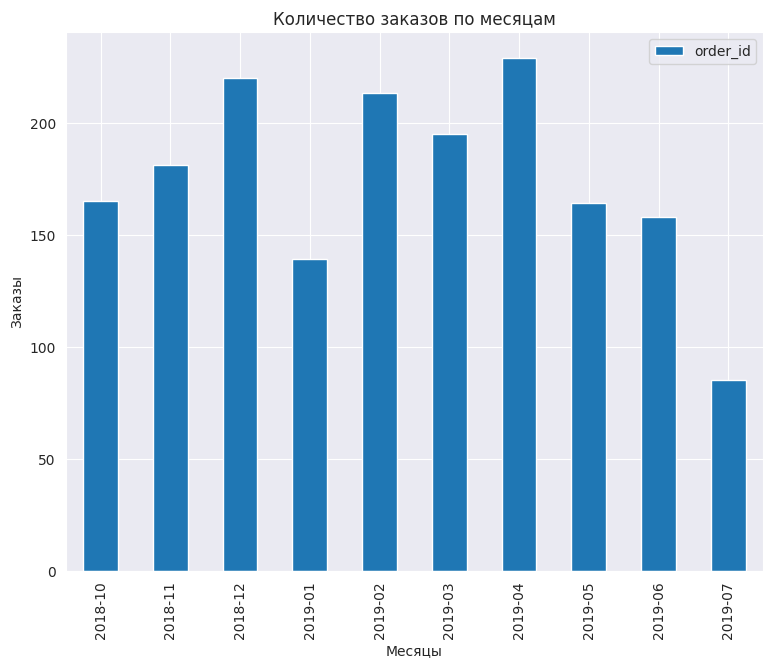

In [ ]:
(df_const


     .pivot_table(index='month',values='order_id',aggfunc='sum')

     .plot.bar(y='order_id',figsize=(9, 7))


)

plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Заказы")
plt.show()
#plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )

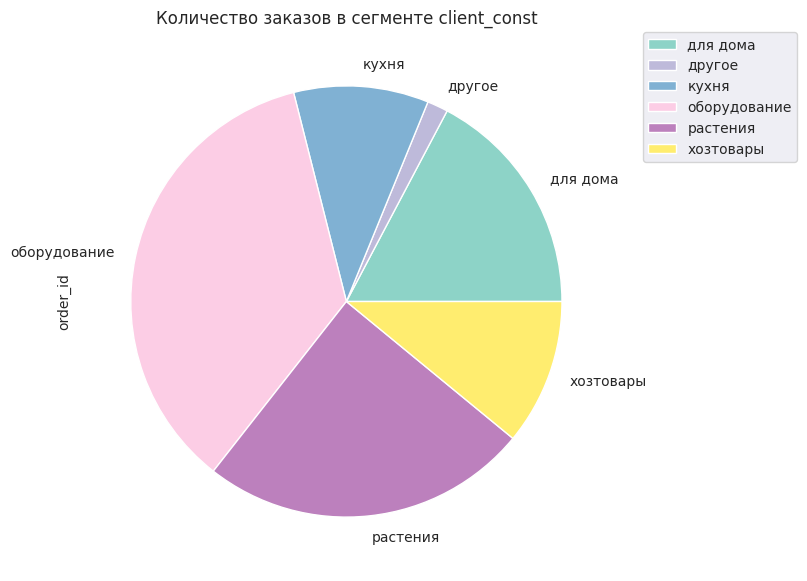

In [ ]:
(df
      .query('client=="client_const"')
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='Set3',figsize=(7, 7))

)
plt.title("Количество заказов в сегменте client_const")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Сегмент постоянные клиенты -покупают достаточно стабильно(в сегмент попали клиенты ,не делавшие покупки в последнее время ),сплеск активности возможно обусловлен ,что много покупают растения весной .**Рекомендации**-данный сегмент опасений не вызывает. Стимулировать спрос можно акциями в выбранных категорий и расширением ассортимента.

In [ ]:
df_new = df_avg.query('client=="client_new"')

In [ ]:
df_new['customer_id'].nunique()#кол-во покупателей

568

In [ ]:
round(df_new['avg_chec'].mean())#средний чек

1324

In [ ]:
df_new['order_id'].sum()#общее кол-во заказов в сегменте

575

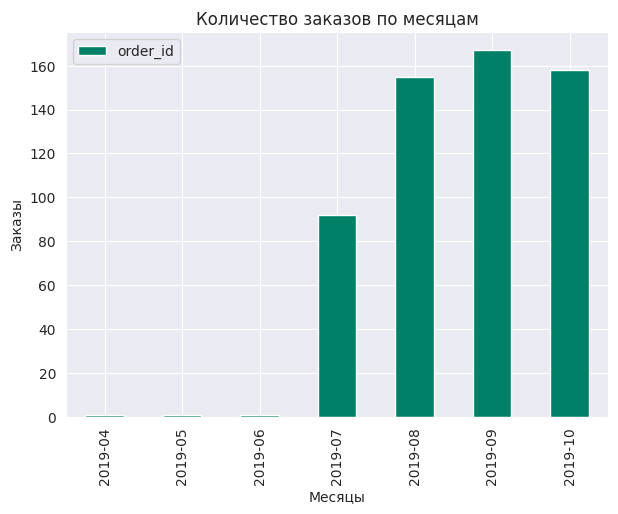

In [ ]:
(df_new


     .pivot_table(index='month',values='order_id',aggfunc='sum')

     .plot.bar(y='order_id',cmap='summer',figsize=(7, 5))


)

plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Заказы")
plt.show()

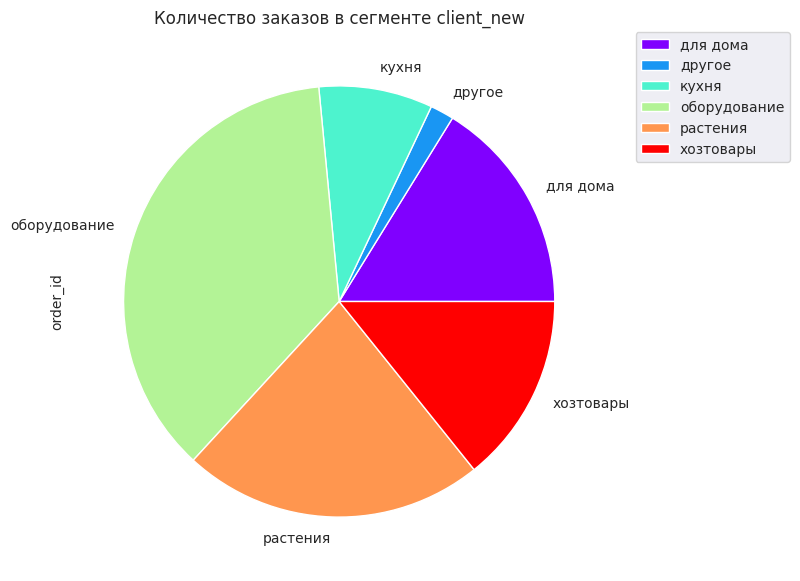

In [ ]:
(df
      .query('client=="client_new"')
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='rainbow',figsize=(7, 7))

)
plt.title("Количество заказов в сегменте client_new")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Новые клиенты покупают почти одинаково все категории товара. Предпочтения не сформированы.

**Рекомендация**- необходимо не упустить эту группу клиентов ,наблюдать за ней . УВеличивать ассортимент в дорогой категории оборудование ,так как у этих клиентов есть к ней интерес

In [ ]:
df_econom = df_avg.query('client=="client_loyal_econom"')

In [ ]:
df_econom['customer_id'].nunique()#кол-во покупателей

18

In [ ]:
round(df_econom['avg_chec'].mean())#средний чек

215

In [ ]:
df_econom['order_id'].sum()#общее кол-во заказов в сегменте

39

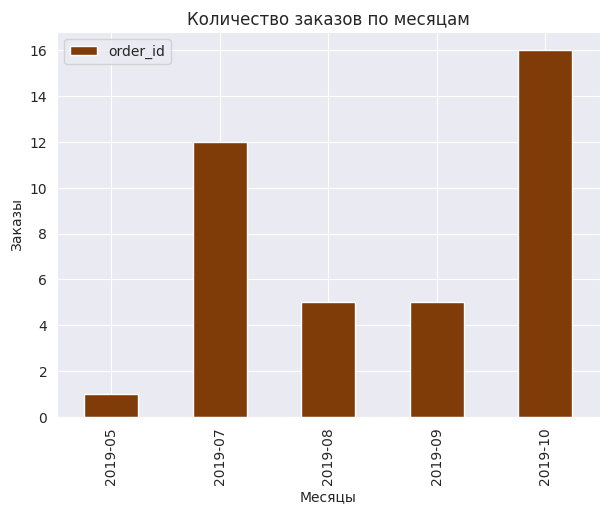

In [ ]:
(df_econom


     .pivot_table(index='month',values='order_id',aggfunc='sum')

     .plot.bar(y='order_id',cmap='PuOr',figsize=(7, 5))


)

plt.grid()
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Заказы")
plt.show()

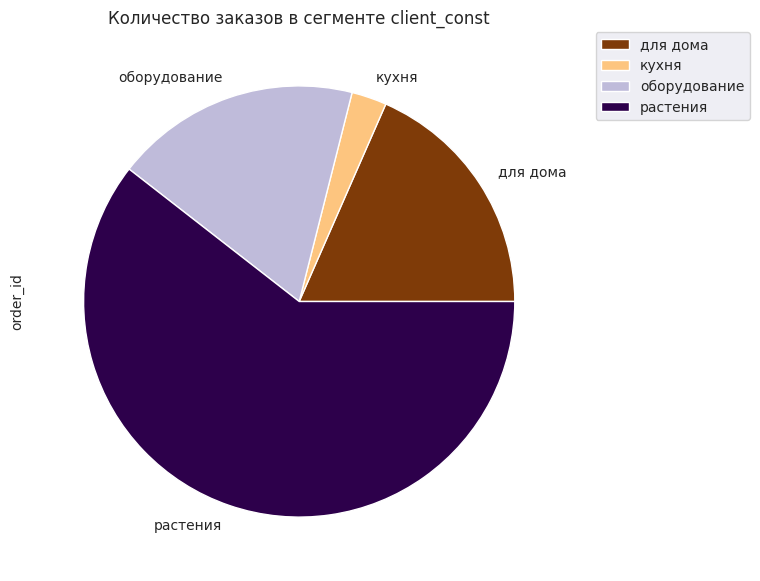

In [ ]:
(df
      .query('client=="client_loyal_econom"')
      .pivot_table(index='category',values='order_id',aggfunc='nunique')
      .plot.pie(y='order_id',cmap='PuOr',figsize=(7, 7))

)
plt.title("Количество заказов в сегменте client_const")
plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

Клиенты покупают стабильно ,они лояльные ,но предпочитают категорию растения,она недорогая. Возможно -это именно целевая аудитория садоводов. **Рекомендация**-сегмент небольшой ,но клиенты лояльные ,Возможно с целью увеличения чека ввести в эту категрию более дорогие  позиции ,сопутствующие товары-кашпо ,держатели для них и пр.

## Статистический анализ данных

Для исследования возьмем критерий Манна-Уитни,к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.Критический уровень статистической значимости возьмем :alpha = 0.05

In [ ]:


df.head()

,date,customer_id,order_id,product,quantity,price,name_categ,category,month,total_revenue,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score,client
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное,растения,2018-10,142.0,396,1,1037.0,1,1,3,113,client_const
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Комнатное,растения,2018-10,194.0,396,1,1037.0,1,1,3,113,client_const
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,растения,2018-10,112.0,396,1,1037.0,1,1,3,113,client_const
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,растения,2018-10,179.0,396,1,1037.0,1,1,3,113,client_const
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,растения,2018-10,112.0,396,1,1037.0,1,1,3,113,client_const


**Сформулируем гипотезы**

H_0:Статистически значимой разницы в среднем чеке для двух пар сегментов  нет

H_a:Статистически значимая разница в среднем чеке для двух пар сегментов  есть

In [ ]:
def test_mw(seg1,seg2):

    df_client_1 = df_avg[df_avg['client']==seg1]['avg_chec']
    df_client_2 = df_avg[df_avg['client']==seg2]['avg_chec']

    results = st.mannwhitneyu(df_client_1,df_client_2)

    print('p-значение: ', results.pvalue)
    alpha = 0.05
    alpha_sid = 1-(1-alpha)**(1/15)# метод Шидака ,нужна поправка поскольку множественные сравнения
    if results.pvalue < alpha_sid:
        print(f'Отвергаем нулевую гипотезу: разница  в среднем чеке для "{seg1}" и "{seg2}"статистически значима')
    else:
        print(f'Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке для "{seg1}"и "{seg2}" сделать нельзя')



In [ ]:

clients = ['client_top','client_loyal_out','client_out','client_loyal_econom','client_const','client_new']

In [ ]:

seg1 ='client_top'
seg2 = 'client_loyal_out'
test_mw(seg1,seg2)

p-значение:  0.9806338423139458
Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке для "client_top"и "client_loyal_out" сделать нельзя


In [ ]:
test_mw('client_top','client_out')

p-значение:  3.0353009769971394e-38
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_top" и "client_out"статистически значима


In [ ]:
test_mw('client_top','client_loyal_econom')

p-значение:  1.534377987002214e-11
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_top" и "client_loyal_econom"статистически значима


In [ ]:
test_mw('client_top','client_const')

p-значение:  0.0016231898255158184
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_top" и "client_const"статистически значима


In [ ]:
test_mw('client_top','client_new')

p-значение:  4.565959485535111e-07
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_top" и "client_new"статистически значима


In [ ]:
test_mw('client_loyal_out','client_out')

p-значение:  4.568388116770255e-12
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_loyal_out" и "client_out"статистически значима


In [ ]:
test_mw('client_loyal_out','client_loyal_econom')

p-значение:  2.0099670679402655e-07
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_loyal_out" и "client_loyal_econom"статистически значима


In [ ]:
test_mw('client_loyal_out','client_const')

p-значение:  0.12046641611242448
Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке для "client_loyal_out"и "client_const" сделать нельзя


In [ ]:
test_mw('client_loyal_out','client_new')

p-значение:  0.009106332800842947
Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке для "client_loyal_out"и "client_new" сделать нельзя


In [ ]:
test_mw('client_out','client_new')

p-значение:  1.793236487647629e-55
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_out" и "client_new"статистически значима


In [ ]:
test_mw('client_out','client_const')

p-значение:  3.3377398415907486e-114
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_out" и "client_const"статистически значима


In [ ]:
test_mw('client_out','client_loyal_econom')

p-значение:  0.11633905927479339
Не получилось отвергнуть нулевую гипотезу, вывод о различии в среднем чеке для "client_out"и "client_loyal_econom" сделать нельзя


In [ ]:
test_mw('client_const','client_loyal_econom')

p-значение:  3.9791370215831295e-11
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_const" и "client_loyal_econom"статистически значима


In [ ]:
test_mw('client_new','client_loyal_econom')

p-значение:  1.5448741101780534e-06
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_new" и "client_loyal_econom"статистически значима


In [ ]:
test_mw('client_const','client_new')

p-значение:  4.212288703306354e-09
Отвергаем нулевую гипотезу: разница  в среднем чеке для "client_const" и "client_new"статистически значима


**Вывод**- в сегментах client_out'и 'client_loyal_econom, client_loyal_out'и'client_new,client_loyal_out'и'client_const,client_top'и 'client_loyal_out
не получилось отвергнуть нулевую гипотезу о равенстве среднего чека, сегменты являются равнозначными по этому показателю

**Проверим вторую гипотезу**

H_0: Статистически значимой разницы в количестве заказов для двух пар сегментов  нет
   
H_a: Статистически значимая разница в количестве заказов для двух пар сегментов  есть


In [ ]:
def test_mw(seg1,seg2):

    df_client_1 = df_avg[df_avg['client']==seg1]['order_id']
    df_client_2 = df_avg[df_avg['client']==seg2]['order_id']

    results = st.mannwhitneyu(df_client_1,df_client_2)

    print('p-значение: ', results.pvalue)
    alpha = 0.05
    alpha_sid = 1-(1-alpha)**(1/15)# метод Шидака ,нужна поправка поскольку множественные сравнения
    if results.pvalue < alpha_sid:
        print(f'Отвергаем нулевую гипотезу: разница  в количестве заказов для "{seg1}" и "{seg2}"статистически значима')
    else:
        print(f'Не получилось отвергнуть нулевую гипотезу, вывод о различии в количестве заказов для "{seg1}"и "{seg2}" сделать нельзя')


In [ ]:

seg1 ='client_top'
seg2 = 'client_loyal_out'
test_mw(seg1,seg2)

p-значение:  0.022250043501356915
Не получилось отвергнуть нулевую гипотезу, вывод о различии в количестве заказов для "client_top"и "client_loyal_out" сделать нельзя


In [ ]:
test_mw('client_top','client_out')

p-значение:  1.4138885015327328e-41
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_top" и "client_out"статистически значима


In [ ]:
test_mw('client_top','client_loyal_econom')

p-значение:  0.5209116615531398
Не получилось отвергнуть нулевую гипотезу, вывод о различии в количестве заказов для "client_top"и "client_loyal_econom" сделать нельзя


In [ ]:
test_mw('client_top','client_const')

p-значение:  1.3451845683437247e-79
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_top" и "client_const"статистически значима


In [ ]:
test_mw('client_top','client_new')

p-значение:  3.8627293606301803e-81
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_top" и "client_new"статистически значима


In [ ]:
test_mw('client_loyal_out','client_out')

p-значение:  2.2824728839715062e-56
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_loyal_out" и "client_out"статистически значима


In [ ]:
test_mw('client_loyal_out','client_loyal_econom')

p-значение:  0.12981742525569975
Не получилось отвергнуть нулевую гипотезу, вывод о различии в количестве заказов для "client_loyal_out"и "client_loyal_econom" сделать нельзя


In [ ]:
test_mw('client_loyal_out','client_const')

p-значение:  1.4213758205206294e-56
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_loyal_out" и "client_const"статистически значима


In [ ]:
test_mw('client_loyal_out','client_new')

p-значение:  5.471492171215348e-115
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_loyal_out" и "client_new"статистически значима


In [ ]:
test_mw('client_out','client_new')

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, вывод о различии в количестве заказов для "client_out"и "client_new" сделать нельзя


In [ ]:
test_mw('client_out','client_const')

p-значение:  0.0007223197952057609
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_out" и "client_const"статистически значима


In [ ]:
test_mw('client_loyal_out','client_new')

p-значение:  5.471492171215348e-115
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_loyal_out" и "client_new"статистически значима


In [ ]:
test_mw('client_loyal_out','client_const')

p-значение:  1.4213758205206294e-56
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_loyal_out" и "client_const"статистически значима


In [ ]:
test_mw('client_loyal_out','client_new')

p-значение:  5.471492171215348e-115
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_loyal_out" и "client_new"статистически значима


In [ ]:
test_mw('client_const','client_new')

p-значение:  8.578223758097857e-07
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_const" и "client_new"статистически значима


In [ ]:
test_mw('client_new','client_loyal_econom')

p-значение:  2.7951794821377437e-89
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_new" и "client_loyal_econom"статистически значима


In [ ]:
test_mw('client_const','client_loyal_econom')

p-значение:  1.2138316971497206e-42
Отвергаем нулевую гипотезу: разница  в количестве заказов для "client_const" и "client_loyal_econom"статистически значима


**Вывод**-в сегментах  client_out'и'client_new ,client_loyal_out'и'client_loyal_econom',client_top'и'client_loyal_econom',client_top'
и 'client_loyal_out  не получилось отвергнуть нулевую гипотезу о равенстве   количества заказов, сегменты являются равнозначными по этому показателю

# Выводы и рекомендации

**На основании ИА определили ,что выручка  магазина падает ,отток клинтов идет. Была проведена сегментация клиентов по их характеру потребления. Выяснены их товарные предпочтения. На основании этого можно сформулировать таргетированные рекомендации.**

Сегмент ТОП (кол-во покупателей 54,средний чек 1702 ,кл-во 143 заказов) - клиенты покупают недавно ,часто ,дорого. Этот сегмент небольшой ,но важный для магазин ,так как клиенты лояльны и покупают дорогую продукцию.Активность в апреле-мае обусловлена видимо покупкой сезонного товара-растений. В октябре видимо мебель ,хранение ,лестницы из категории оборудования. **Рекомендация-наблюдать за этой группой ,стимулировать активность индивидуальными бонусами и скидками. Расширять ассортимент качественных и дорогих товаров. Покупатели на него уже есть.**  

 Сегмент -Лояльные клиенты на пороге оттока (кол-во покупателей 14,средний чек 1600 ,кл-во 63 заказов) Немногочисленный сегмент ,в котором клиенты перестали делать покупки и уже на выходе. Но у клиентов был достаточно высокий средний чек и за них можно побороться.  **Рекомендация- сделать для клиентов рассылку ,чтобы напомнить о магазине. Подготовить спец предложение в любимых категориях**

Постоянные клиенты(кол-во покупателей 1497,средний чек 1449 ,кл-во 1705 заказов) . Покупают достаточно стабильно(в сегмент попали клиенты ,не делавшие покупки в последнее время ),всплеск активности возможно обусловлен ,что много покупают растения весной .**Рекомендации-этот сегмент опасений не вызывает. Стимулировать спрос можно акциями в выбранных категорий и расширением ассортимента**

Клиенты в оттоке.(кол-во покупателей 255,средний чек 157 ,кл-во 256 заказов) Клиенты полгода ничего не покупают , этим было обусловлено выделение этого  сегмента. Предпочтения- растения. **Рекомендации-клиенты давно не покупают ,когда делали покупку средний чек был низкий. Скорее всего-это уже потерянные клиенты.За них бороться нет смысла
Лучше привлекать новых**

Новые клиенты(кол-во покупателей 555,средний чек 1086 ,кл-во 555 заказов) . Новые клиенты покупают почти одинаково все категории товаров , но больше из категории оборудование**Рекомендация- необходимо не упустить эту группу клиентов ,наблюдать за ней . Увеличивать ассортимент в дорогой категории оборудование ,так как у этих клиентов есть к ней интерес**

Клиенты эконом.(кол-во покупателей 18,средний чек 194 ,кл-во 138 заказов) . Клиенты покупают стабильно ,они лояльные ,но предпочитают категорию растения , она недорогая. Возможно -это именно целевая аудитория садоводов. **Рекомендация-сегмент небольшой ,но клиенты лояльные .Возможно с целью увеличения чека ввести в эту категорию более дорогие позиции ,сопутствующие товары-кашпо ,держатели для них и пр.**

# Презентация

https://drive.google.com/file/d/1s3m17WZzw2ugKxWmN2dlqrbJLs4dlXUb/view?usp=sharing